In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score,mean_absolute_error
from data_preprocess import *

In [2]:
def plot_score(s,y1=-50,y2=400):
    y_pred=est.predict(X_test_scaled)
    plt.figure(figsize=(16,8),dpi=300)
    plt.plot(Y_test.values,'b-',label='Actual Value')
    plt.plot(y_pred,'r-',label='Predicted Value')
    plt.ylim(y1,y2)
    plt.ylabel('Concentration')
    plt.xlabel('Test Sample')
    plt.text(0,y2-10,"R$^2$= {}".format(est.score(X_test_scaled,Y_test)))
    plt.text(0,y2-20,"Mean absolute error= {}".format(mean_absolute_error(Y_test.values,y_pred)))
    plt.title(s)
    _=plt.legend()

In [3]:
df=load_roundhill_data()
test_set=[14,26,32,15,33]
X_train=df.drop(test_set)
X_test=df.loc[test_set]
Y_train=X_train.pop('C(mg/m3)')
Y_test=X_test.pop('C(mg/m3)')
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

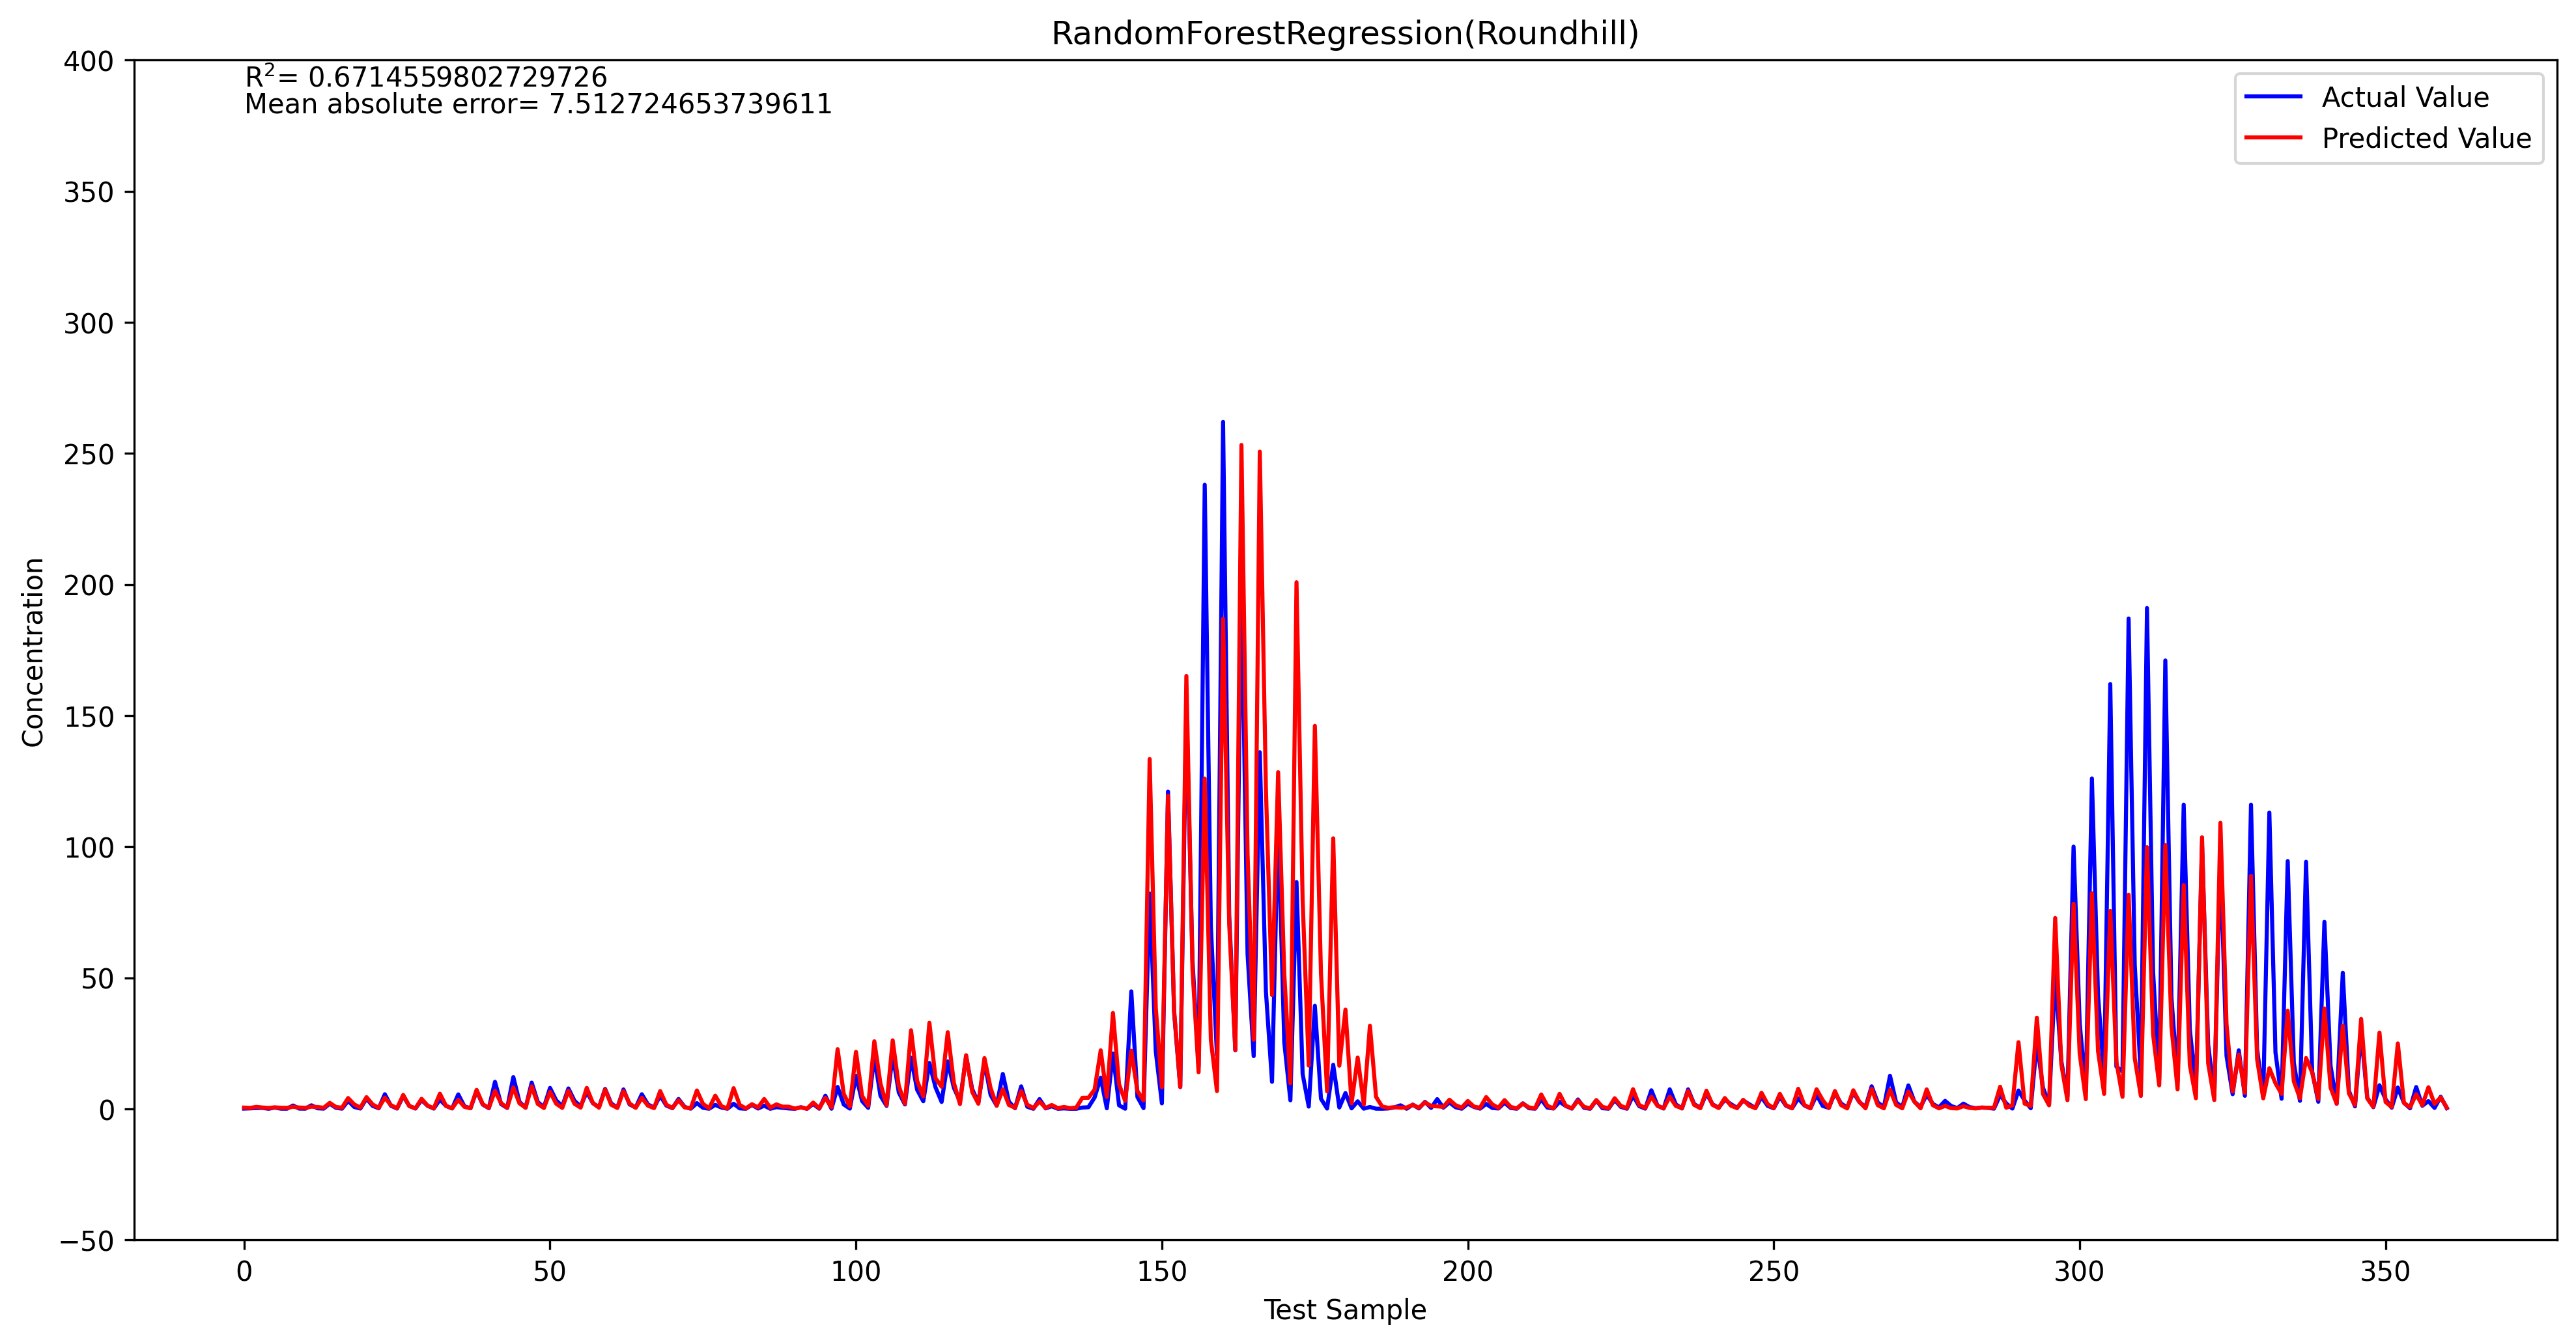

In [4]:
est=RandomForestRegressor(n_estimators=50,criterion='mae',max_features='auto',n_jobs=-1).fit(X_train_scaled,Y_train)
plot_score('RandomForestRegression(Roundhill)')

In [5]:
df=load_prairie_data()
test_set=[19,27,37,57,67]
X_train=df.drop(test_set)
X_test=df.loc[test_set]
Y_train=X_train.pop('C(g/m3)')
Y_test=X_test.pop('C(g/m3)')
scaler=MinMaxScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

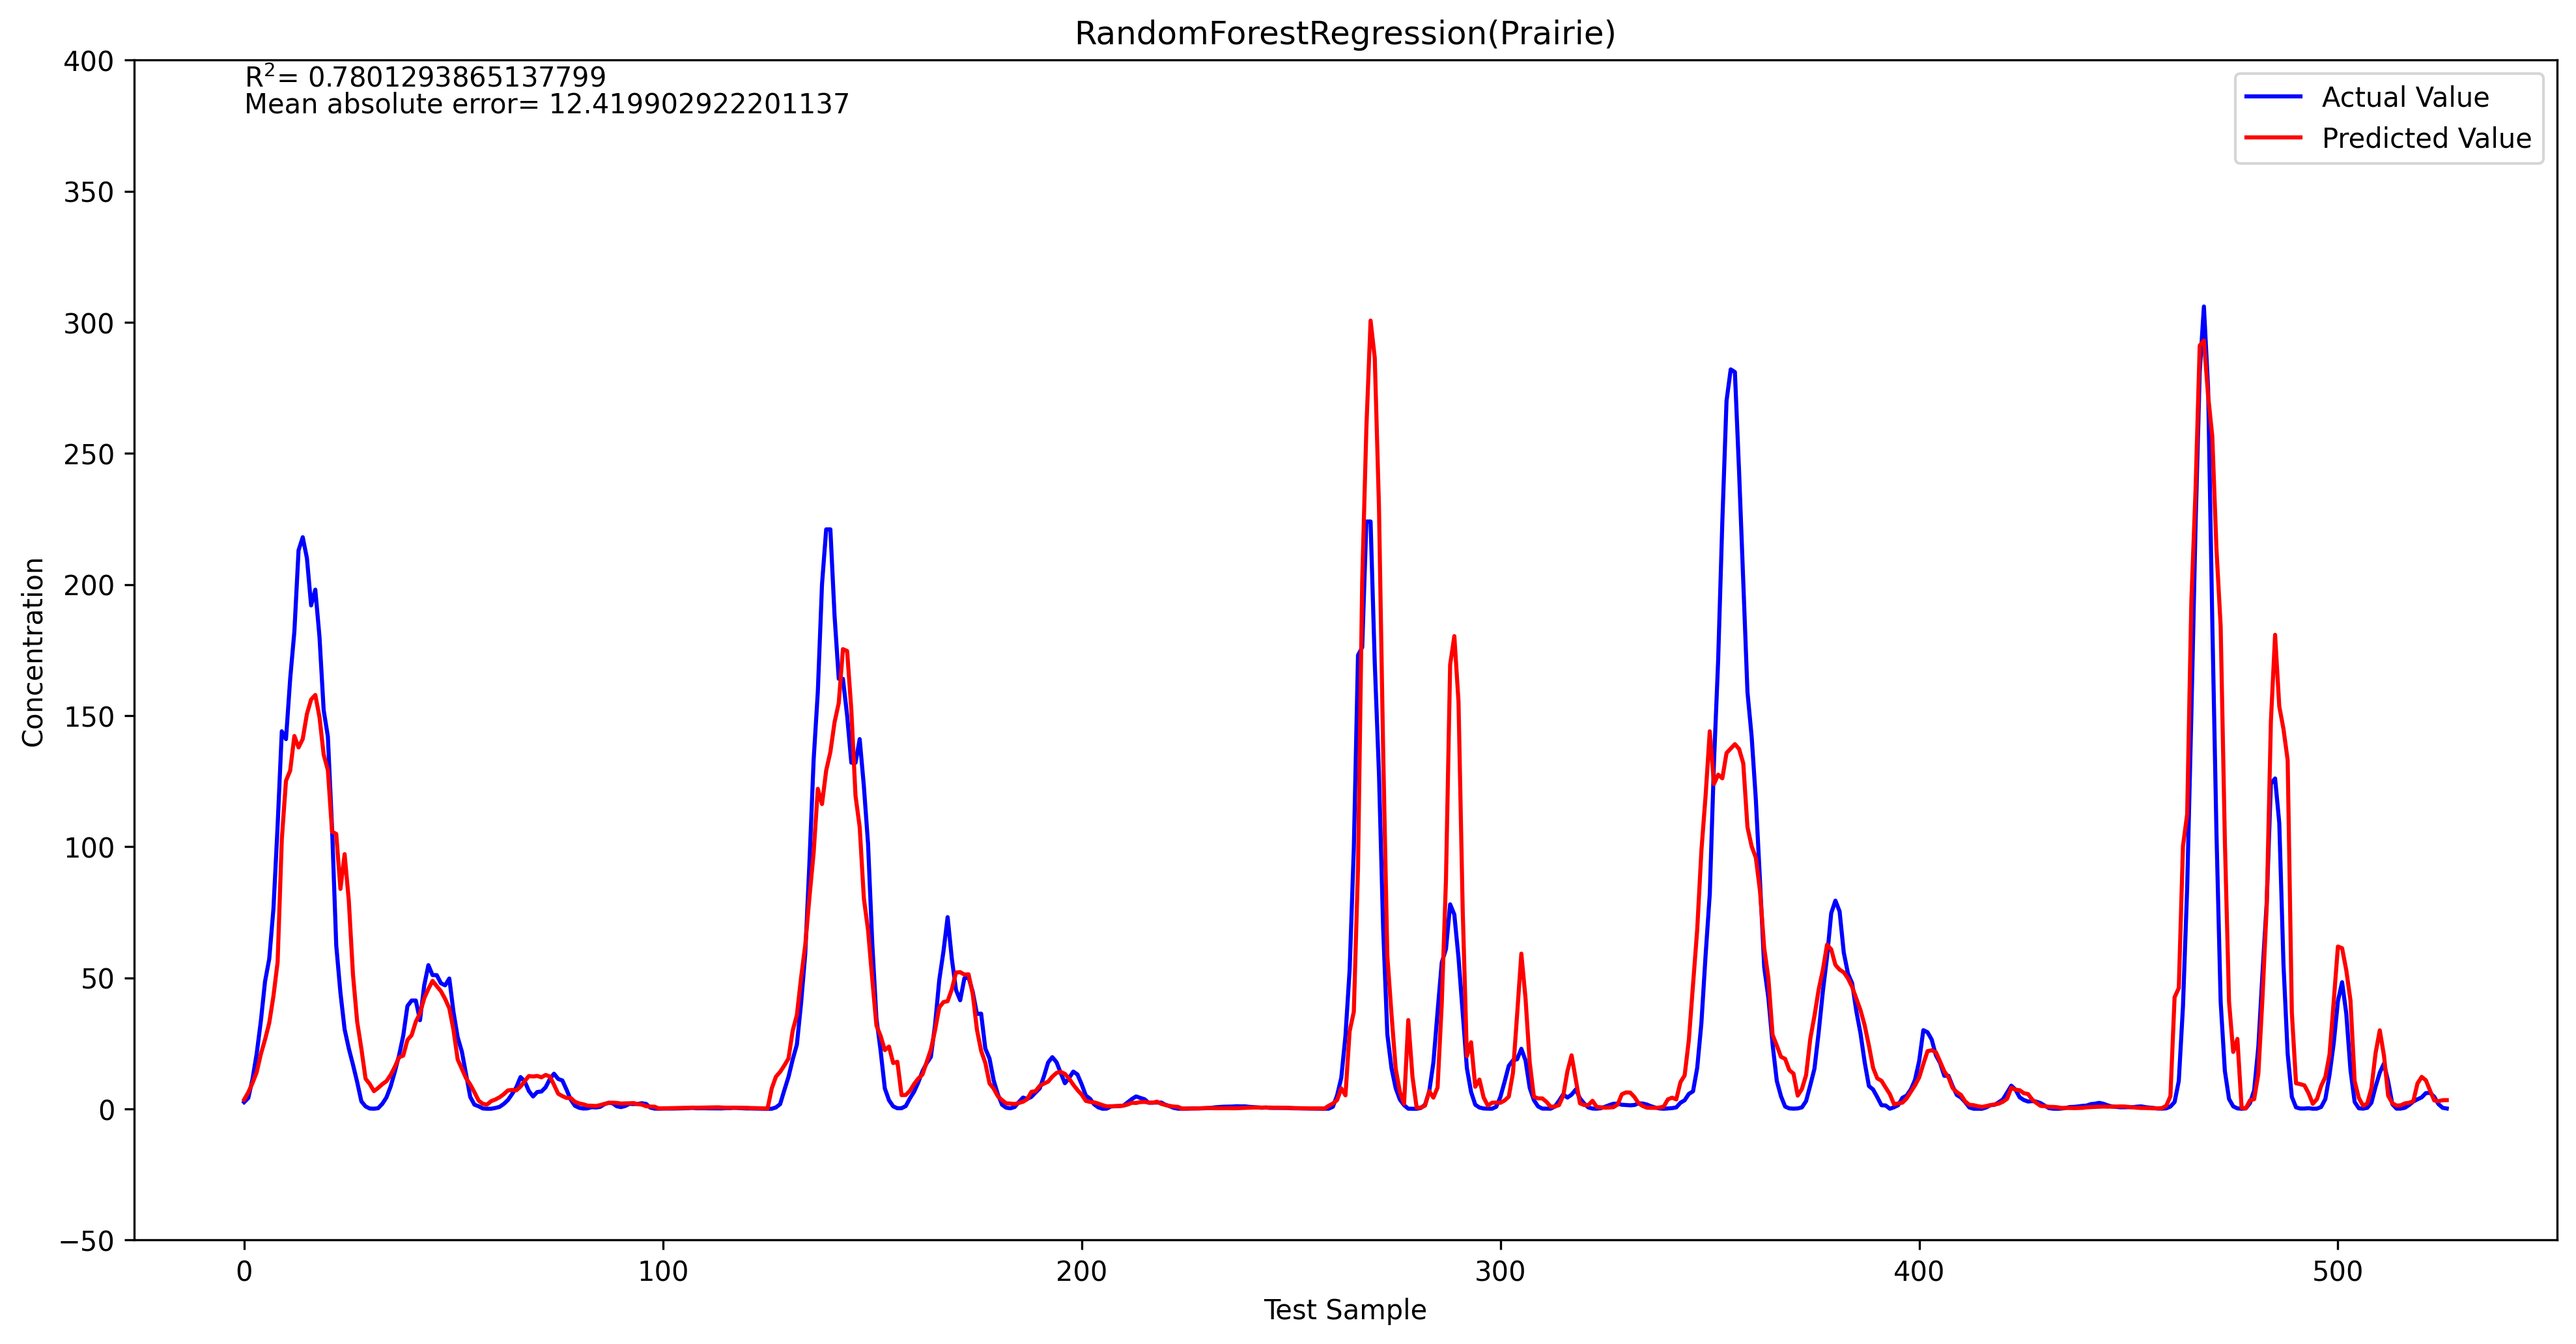

In [6]:
est=RandomForestRegressor(n_estimators=50,criterion='mae',max_features='auto',n_jobs=-1).fit(X_train_scaled,Y_train)
plot_score('RandomForestRegression(Prairie)')